In [107]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats

In [108]:
#importing the dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [109]:
df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880], dtype=int64)

In [110]:
dfweekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               11544 non-null int64
date                      11544 non-null object
n_daily_data_points       11544 non-null int64
dayOfWeek                 11544 non-null int64
day_type                  11544 non-null object
BlueCars_taken_sum        11544 non-null int64
BlueCars_returned_sum     11544 non-null int64
Utilib_taken_sum          11544 non-null int64
Utilib_returned_sum       11544 non-null int64
Utilib_14_taken_sum       11544 non-null int64
Utilib_14_returned_sum    11544 non-null int64
Slots_freed_sum           11544 non-null int64
Slots_taken_sum           11544 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.2+ MB


In [111]:
dfweekday.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1430.007277,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,36.882140,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,1440.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [112]:
df.date.unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [113]:
#converting the date column datatype to datetime 
df['date'] = pd.to_datetime(df['date'])

In [114]:
#creating month 1 dataframe 
january = df[(df.date >= '1/1/2018')& (df.date <= '1/31/2018') & (df.day_type == 'weekday')]
january.shape

(2369, 13)

In [115]:
#creating month 3 dataframe
march = df[(df.date >= '3/1/2018')& (df.date <= '3/31/2018') & (df.day_type == 'weekday')]
march.shape

(2259, 13)

In [116]:
#reconverting the date column datatype back to str
march.date = march.date.apply(str)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [117]:
january.date = january.date.apply(str)

In [118]:
#removing outliers
q1 = january.quantile(0.25)
q3 = january.quantile(0.75)
IQR = q3-q1
january = january[~((january < (q1 - 1.5 * IQR)) |(january > (q3 + 1.5 * IQR))).any(axis=1)]
january.shape

(1502, 13)

In [119]:
#removing outliers
q1 = january.quantile(0.25)
q3 = january.quantile(0.75)
IQR = q3-q1
march = march[~((march < (q1 - 1.5 * IQR)) |(march > (q3 + 1.5 * IQR))).any(axis=1)]
march.shape

(1073, 13)

In [120]:
#checking for null values
march.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [121]:
january.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## Univariate analysis

In [122]:
march['dayOfWeek'].value_counts()

3    218
4    216
2    215
0    215
1    209
Name: dayOfWeek, dtype: int64

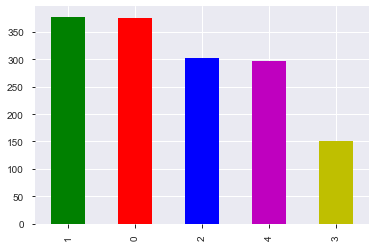

In [123]:
colors = ['g','r','b','m','y']
january.dayOfWeek.value_counts().plot.bar(color = colors)

In [124]:
january.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 3899 to 15959
Data columns (total 13 columns):
Postal code               1502 non-null int64
date                      1502 non-null object
n_daily_data_points       1502 non-null int64
dayOfWeek                 1502 non-null int64
day_type                  1502 non-null object
BlueCars_taken_sum        1502 non-null int64
BlueCars_returned_sum     1502 non-null int64
Utilib_taken_sum          1502 non-null int64
Utilib_returned_sum       1502 non-null int64
Utilib_14_taken_sum       1502 non-null int64
Utilib_14_returned_sum    1502 non-null int64
Slots_freed_sum           1502 non-null int64
Slots_taken_sum           1502 non-null int64
dtypes: int64(11), object(2)
memory usage: 164.3+ KB


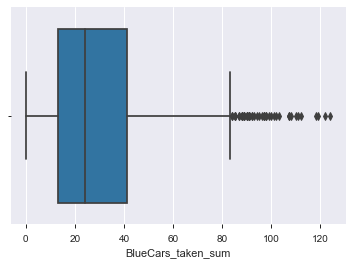

In [125]:
sns.boxplot(march['BlueCars_taken_sum'])

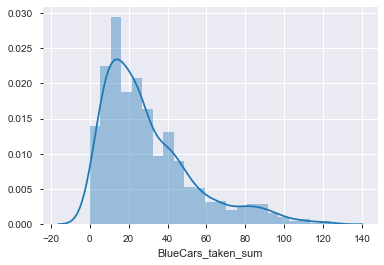

In [126]:
sns.distplot(march['BlueCars_taken_sum'])

In [127]:
#creating a sample of 30 variables
marchsample = march.sample(n= 30)
marchsample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5992,92200,2018-03-12 00:00:00,1440,0,weekday,37,41,2,2,5,5,0,0
4756,92110,2018-03-23 00:00:00,1440,4,weekday,16,22,0,0,5,3,0,0
7095,92270,2018-03-23 00:00:00,1440,4,weekday,24,21,3,3,1,1,0,0
10348,93130,2018-03-14 00:00:00,1440,2,weekday,20,21,3,5,2,3,0,0
14753,94340,2018-03-16 00:00:00,1440,4,weekday,22,24,1,0,2,1,0,0


In [128]:
jansample = january.sample(n=30)
jansample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
7340,92300,2018-01-12 00:00:00,1439,4,weekday,151,151,1,1,6,8,0,0
13278,94110,2018-01-01 00:00:00,1440,0,weekday,41,36,3,2,6,4,0,0
11654,93360,2018-01-08 00:00:00,1438,0,weekday,14,15,0,0,0,1,0,0
15625,95100,2018-01-09 00:00:00,1439,1,weekday,15,12,1,0,0,0,0,0
4990,92130,2018-01-02 00:00:00,1438,1,weekday,222,213,9,6,16,17,1,1


In [129]:
jansample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,93409.000000,1439.200000,1.666667,42.566667,42.633333,1.100000,1.066667,2.600000,2.933333,0.300000,0.300000
std,1269.288017,0.886683,1.372974,49.763360,48.941544,1.844844,1.574218,3.179677,3.571278,0.794377,0.794377
min,91330.000000,1437.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92277.500000,1439.000000,1.000000,14.250000,14.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93335.000000,1439.000000,1.500000,25.500000,28.000000,1.000000,0.500000,1.000000,2.000000,0.000000,0.000000
75%,94150.000000,1440.000000,2.000000,42.500000,42.500000,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000
max,95880.000000,1440.000000,4.000000,222.000000,213.000000,9.000000,6.000000,16.000000,17.000000,3.000000,3.000000


In [130]:
marchsample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,93177.333333,1439.900000,2.633333,29.533333,29.300000,1.100000,1.133333,2.333333,2.166667,0.0,0.0
std,981.768051,0.305129,1.449931,26.725596,24.094856,1.295882,1.407696,2.309401,1.984132,0.0,0.0
min,91370.000000,1439.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,92280.000000,1440.000000,1.250000,13.000000,13.250000,0.000000,0.000000,1.000000,1.000000,0.0,0.0
50%,93310.000000,1440.000000,3.000000,18.000000,19.500000,0.500000,0.000000,2.000000,2.000000,0.0,0.0
75%,93750.000000,1440.000000,4.000000,38.500000,40.000000,2.000000,2.000000,3.750000,3.000000,0.0,0.0
max,95880.000000,1440.000000,4.000000,100.000000,89.000000,4.000000,5.000000,10.000000,8.000000,0.0,0.0


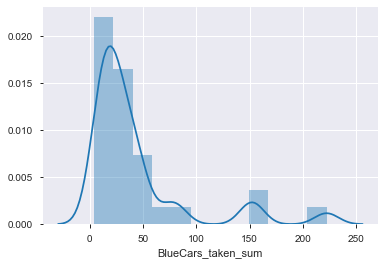

In [131]:
sns.distplot(jansample['BlueCars_taken_sum'])

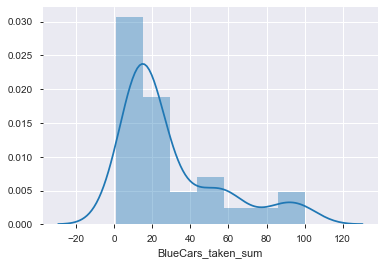

In [132]:
sns.distplot(marchsample['BlueCars_taken_sum'])

## Bivariate analysis

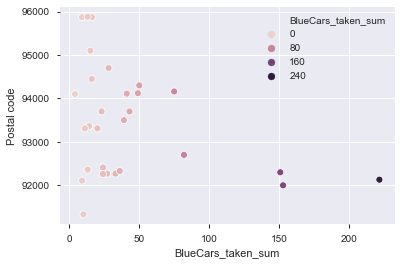

In [133]:
x = jansample.BlueCars_taken_sum
y = jansample['Postal code']
sns.scatterplot(x,y,hue = x)

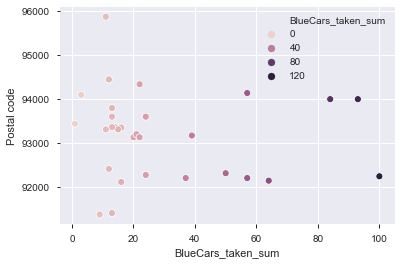

In [134]:
r = marchsample.BlueCars_taken_sum
v = marchsample['Postal code']
sns.scatterplot(r,v,hue = r)

## Hypothesis testing

In [135]:
#calculating the t test
deviation = (marchsample['BlueCars_taken_sum'].std() + jansample['BlueCars_taken_sum'].std())/2

tstat = (marchsample['BlueCars_taken_sum'].mean() - jansample['BlueCars_taken_sum'].mean())/deviation
tstat

-0.340789942073946

In [136]:
#calculating the p value
df = (2*30) -2
p = 1 - stats.t.cdf(tstat,df = df)
p

0.632753448549394